# Upload Data

In [2]:
# import libraries
import pandas as pd
import numpy as np

# load data
data = pd.read_excel('D:\Skripsi\Syntax\Skripsi\SKILICARSLAN_Anemia_DataSet_2.xlsx')
data = data[['Gender', 'Hemoglobin', 'HCT', 'MCH', 'MCHC', 'MCV', 'RBC', 'Result']]

# display data
print(data)

# displays the data type of each variable
print(data.dtypes)

<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\alfar\AppData\Local\Temp\ipykernel_12900\3667585835.py:6: SyntaxWarning: invalid escape sequence '\S'
  data = pd.read_excel('D:\Skripsi\Syntax\Skripsi\SKILICARSLAN_Anemia_DataSet_2.xlsx')


       Gender  Hemoglobin   HCT   MCH  MCHC    MCV   RBC  Result
0           0        12.7  37.6  29.5  33.8   87.2  4.31       1
1           0        12.8  36.9  29.5  34.7   85.0  4.34       1
2           0         9.4  27.5  29.6  34.2   86.5  3.18       1
3           0        10.5  31.4  31.3  33.4   93.7  3.35       1
4           0         5.1  14.3  38.9  35.7  109.2  1.31       1
...       ...         ...   ...   ...   ...    ...   ...     ...
15295       1        12.0  35.2  33.5  34.1   98.3  3.58       0
15296       1        13.1  39.9  27.5  32.8   83.6  4.77       0
15297       1        13.7  41.2  27.7  33.3   83.2  4.95       0
15298       1        12.1  38.8  27.0  31.2   86.6  4.48       0
15299       1        13.8  40.1  28.9  34.4   83.9  4.78       0

[15300 rows x 8 columns]
Gender          int64
Hemoglobin    float64
HCT           float64
MCH           float64
MCHC          float64
MCV           float64
RBC           float64
Result          int64
dtype: object


# Preprocessing Data

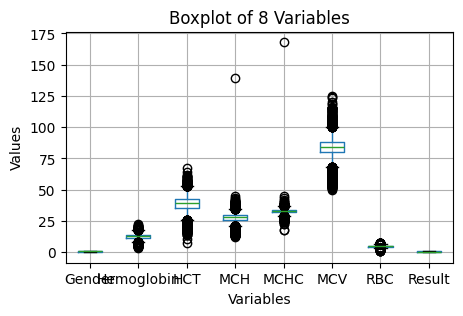

In [4]:
# Distribution of Each Variable (Box-plot)
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
data.boxplot()
plt.title('Boxplot of 8 Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

In [3]:
# Extreme Outlier Detection
extreme_outlier_mch_dg = data[data['MCH'] > 60]
extreme_outlier_mchc_dg = data[data['MCHC'] > 60]
print(f'Extreme outlier berdasarkan variabel MCH: \n{extreme_outlier_mch_dg}\n')
print(f'Extreme outlier berdasarkan variabel MCHC: \n{extreme_outlier_mchc_dg}')

Extreme outlier berdasarkan variabel MCH: 
      Gender  Hemoglobin   HCT    MCH   MCHC   MCV   RBC  Result
6209       1        12.1  7.21  139.0  168.0  82.8  0.87       0

Extreme outlier berdasarkan variabel MCHC: 
      Gender  Hemoglobin   HCT    MCH   MCHC   MCV   RBC  Result
6209       1        12.1  7.21  139.0  168.0  82.8  0.87       0


In [4]:
# Cleaning Data from Extreme Outliers
data = data.drop(extreme_outlier_mch_dg.index)

In [7]:
# Missing Values Detection
print(data.isnull().sum())

Gender        0
Hemoglobin    0
HCT           0
MCH           0
MCHC          0
MCV           0
RBC           0
Result        0
dtype: int64


In [8]:
# Null Values Detection
nul_value = data.apply(lambda x: (x == 0).sum())
print(nul_value)

Gender        4921
Hemoglobin       0
HCT              0
MCH              0
MCHC             0
MCV              0
RBC              0
Result        9746
dtype: int64


# Exploratory Data Analysis

In [9]:
# Statistics Descriptif
description = data.describe()

# Adding The Mode Value of Each Variable
mode = data.mode().iloc[0]

# Adding The Mode to Statistics Descriptif
description.loc['mode'] = mode

print(description)

             Gender    Hemoglobin           HCT           MCH          MCHC  \
count  15299.000000  15299.000000  15299.000000  15299.000000  15299.000000   
mean       0.678345     12.781249     38.960966     27.368169     32.735764   
std        0.467127      2.097546      5.596407      3.263440      1.743473   
min        0.000000      2.990000     10.300000     12.550000     18.070000   
25%        0.000000     11.600000     35.700000     25.940000     31.790000   
50%        1.000000     12.820000     39.140000     27.960000     32.900000   
75%        1.000000     14.100000     42.480000     29.400000     33.800000   
max        1.000000     22.450000     67.400000     44.680000     44.870000   
mode       1.000000     12.300000     37.700000     28.400000     33.200000   

                MCV           RBC        Result  
count  15299.000000  15299.000000  15299.000000  
mean      83.425318      4.689409      0.362965  
std        7.564843      0.662223      0.480871  
min      

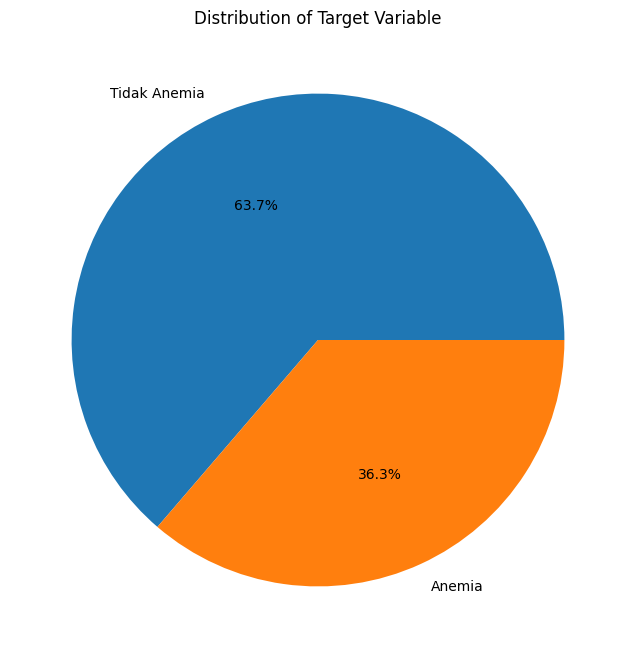

In [12]:
# Target Variable Analysis
import matplotlib.pyplot as plt

result_no_anemia = 0
result_anemia = 0

for i in data['Result']:
  if i == 1:
    result_anemia += 1
  else:
    result_no_anemia += 1

labels = ['Tidak Anemia', 'Anemia']
values = [result_no_anemia, result_anemia]

# Distribution of Target Variable (Pie Chart)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Target Variable')
plt.show()

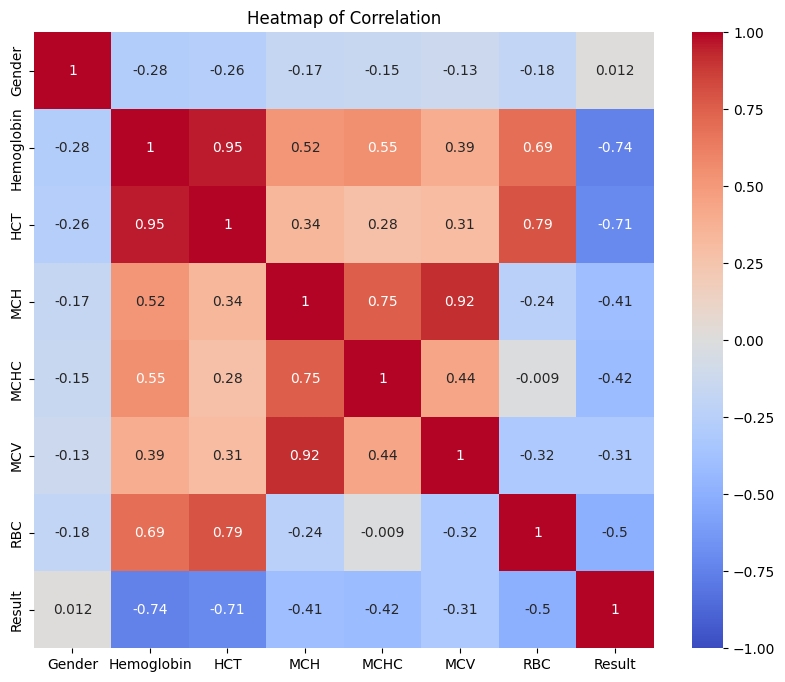

In [13]:
# Coefficient of Correlation
import seaborn as sns

# Correlation Matrix for Each Variable
correlation_matrix = data.corr()

# Heatmap of Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap of Correlation")
plt.show()

# Feature Scaling

In [5]:
data1 = data.copy()

# Split Dataset (train test split)
X = data1.drop(columns='Result')
y = data1['Result']

# Divide The Data into Train Data and Test Data
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# Implement MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Inisialization Min-Max Scaler
mm_scaler = MinMaxScaler()

# Scaling only for data training
X_train_num = mm_scaler.fit_transform(X_train1[['Hemoglobin', 'HCT','MCH', 'MCHC', 'MCV', 'RBC']])

# Using The Same Scaling Parameters for Data Testing
X_test_num = mm_scaler.transform(X_test1[['Hemoglobin', 'HCT', 'MCH', 'MCHC', 'MCV', 'RBC']])

# Combining Gender Data with Scaled Numerical Data
X_train_processed = np.hstack((X_train1[['Gender']].values, X_train_num))
X_test_processed = np.hstack((X_test1[['Gender']].values, X_test_num))


# Implement SVM and KNN algorithms

## SVM Algorithm

In [12]:
# SVM Classification Algorithm
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import SVC
import time

# Start Time
start_time = time.time()

# Training SVM Model
svm_model = SVC()
print(f"Parameter model :\n{svm_model.get_params()}\n")

svm_model.fit(X_train_processed, y_train1)

# Predict and Test The Model
y_pred = svm_model.predict(X_test_processed)

# Testing The Accuracy of The Model
accuracy = accuracy_score(y_test1, y_pred)
print(f"Akurasi = {accuracy}")

# Testing The Precision of The Model
precision = precision_score(y_test1, y_pred)
print(f"Presisi = {precision}")

# Testing The Recall of The Model
recall = recall_score(y_test1, y_pred)
print(f"Recall = {recall}")

# Testing The F1-Score of The Model
f1 = f1_score(y_test1, y_pred)
print(f"F1-score = {f1}")

# Confusion matrix
confusion_mat = confusion_matrix(y_test1, y_pred)
print(confusion_mat)

# Computation time
computation_time = time.time() - start_time
print(f"\nComputation time : {computation_time} sec")

Parameter model :
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Akurasi = 0.9970588235294118
Presisi = 0.9990503323836657
Recall = 0.9924528301886792
F1-score = 0.995740653099858
[[1999    1]
 [   8 1052]]

Computation time : 1.811898946762085 sec


## KNN Algorithm

In [11]:
# KNN Classification Algorithm
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import time

# Start Time
start_time = time.time()

# Training KNN Model
knn_model = KNeighborsClassifier()
print(f"Parameter model :\n{knn_model.get_params()}\n")

knn_model.fit(X_train_processed, y_train1)

# Predict and Test The Model
y_pred = knn_model.predict(X_test_processed)

# Testing The Accuracy of The Model
accuracy = accuracy_score(y_test1, y_pred)
print(f"Akurasi = {accuracy}")

# Testing The Precision of The Model
precision = precision_score(y_test1, y_pred)
print(f"Presisi = {precision}")

# Testing The Recall of The Model
recall = recall_score(y_test1, y_pred)
print(f"Recall = {recall}")

# Testing The F1-Score of The Model
f1 = f1_score(y_test1, y_pred)
print(f"F1-score = {f1}")

# Confusion matrix
confusion_mat = confusion_matrix(y_test1, y_pred)
print(confusion_mat)

# Computation time
computation_time = time.time() - start_time
print(f"\nComputation time : {computation_time} sec")

Parameter model :
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

Akurasi = 0.9866013071895425
Presisi = 0.9793038570084666
Recall = 0.9820754716981132
F1-score = 0.9806877060763071
[[1978   22]
 [  19 1041]]

Computation time : 0.410625696182251 sec


## SVM Linear Algorithm (Tuned Parameters)

In [ ]:
# Hyperparameters Tuning SVM Linear Classification Algorithm
from sklearn.model_selection import GridSearchCV

# List of Hyperparameters to be Tuned
c = [0.1, 1, 10, 100]
kernel = ['linear']

# Convert to Dictionary Form
hyperparameters = dict(C=c, kernel=kernel)

# Use Gridsearch
clf = GridSearchCV(svm_model, hyperparameters, scoring = 'accuracy', cv=5)

# Fit The Model
best_model = clf.fit(X_train_processed, y_train1)

# Display The Score of Each Possible Parameter
results = pd.DataFrame(clf.cv_results_)
scores = results[['param_C', 'param_kernel', 'mean_test_score']]
print(scores)

# Best Hyperparameters
best_score = best_model.best_score_
best_params = best_model.best_params_
print(f"Best Score: {best_score}")
print(f"Best Parameters: {best_params}")

In [10]:
# SVM Linear Algorithm
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import SVC
import time

# Start time
start_time = time.time()

# Training SVM Linear Model
svm_linear_model = SVC(C=100, kernel='linear', probability=True)
print(f"Parameter model :\n{svm_linear_model.get_params()}\n")

svm_linear_model.fit(X_train_processed, y_train1)

# Predict and Test The Model
y_pred = svm_linear_model.predict(X_test_processed)

# Testing The Accuracy of The Model
accuracy = accuracy_score(y_test1, y_pred)
print(f"Akurasi = {accuracy}")

# Testing The Precision of The Model
precision = precision_score(y_test1, y_pred)
print(f"Presisi = {precision}")

# Testing The Recall of The Model
recall = recall_score(y_test1, y_pred)
print(f"Recall = {recall}")

# Testing The F1-Score of The Model
f1 = f1_score(y_test1, y_pred)
print(f"F1-score = {f1}")

# Confusion Matrix
confusion_mat_linear = confusion_matrix(y_test1, y_pred)
print(confusion_mat_linear)

# Computation Time
computation_time = time.time() - start_time
print(f'\nComputation Time : {computation_time} detik')


Parameter model :
{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Akurasi = 0.996078431372549
Presisi = 0.995274102079395
Recall = 0.9933962264150943
F1-score = 0.9943342776203966
[[1995    5]
 [   7 1053]]

Computation Time : 2.5174458026885986 detik


## SVM Polynomial Algorithm (Tuned Parameters)

In [ ]:
# Hyperparameters Tuning SVM Polynomial Classification Algorithm
from sklearn.model_selection import GridSearchCV

# List of Hyperparameters to be Tuned
c = [0.1, 1, 10, 100]
degree = [2, 3, 4, 5]
kernel = ['poly']

# Convert to Dictionary Form
hyperparameters = dict(C=c, degree=degree, kernel=kernel)

# Use Gridsearch
clf = GridSearchCV(svm_model, hyperparameters, scoring = 'accuracy', cv=5)

# Fit the model
best_model = clf.fit(X_train_processed, y_train1)

# Display The Score of Each Possible Parameter
results = pd.DataFrame(clf.cv_results_)
scores = results[['param_C', 'param_degree', 'param_kernel', 'mean_test_score']]
print(scores)

# Best Hyperparameters
best_score = best_model.best_score_
best_params = best_model.best_params_
print(f"Best Score: {best_score}")
print(f"Best Parameters: {best_params}")


In [9]:
# SVM Polynomial Algorithm
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import SVC
import time

# Start time
start_time =time.time()

# Training SVM Polynomial Model
svm_poly_model = SVC(C=100, degree=5, kernel='poly', probability=True)
print(f"Parameter model :\n{svm_poly_model.get_params()}\n")

svm_poly_model.fit(X_train_processed, y_train1)

# Predict and Test The Model
y_pred = svm_poly_model.predict(X_test_processed)

# Testing The Accuracy of The Model
accuracy = accuracy_score(y_test1, y_pred)
print(f"Akurasi = {accuracy}")

# Testing The Precision of The Model
precision = precision_score(y_test1, y_pred)
print(f"Presisi = {precision}")

# Testing The Recall of The Model
recall = recall_score(y_test1, y_pred)
print(f"Recall = {recall}")

# Testing The F1-Score of The Model
f1 = f1_score(y_test1, y_pred)
print(f"F1-score = {f1}")

# Confusion matrix
confusion_mat = confusion_matrix(y_test1, y_pred)
print(confusion_mat)

# Waktu komputasi (latih & uji)
computation_time = time.time() - start_time
print(f'\nComputation Time : {computation_time} sec')



Parameter model :
{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 5, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Akurasi = 0.9993464052287582
Presisi = 0.9981167608286252
Recall = 1.0
F1-score = 0.9990574929311969
[[1998    2]
 [   0 1060]]

Computation Time : 10.036999702453613 sec


## SVM RBF Algorithm (Tuned Parameters)

In [ ]:
# Hyperparameters Tuning SVM Classification Algorithm
from sklearn.model_selection import GridSearchCV

# List of Hyperparameters to be Tuned
c = [0.1, 1, 10, 100]
gamma = [0.001, 0.01, 0.1, 1]
kernel = ['rbf']

# Convert to Dictionary Form
hyperparameters = dict(C=c, gamma=gamma, kernel=kernel)

# Use Gridsearch
clf = GridSearchCV(svm_model, hyperparameters, scoring = 'accuracy', cv=5)

# Fit the model
best_model = clf.fit(X_train_processed, y_train1)

# Display The Score of Each Possible Parameter
results = pd.DataFrame(clf.cv_results_)
scores = results[['param_C', 'param_gamma', 'param_kernel', 'mean_test_score']]
print(scores)

# Best Hyperparameters
best_score = best_model.best_score_
best_params = best_model.best_params_
print(f"Best Score: {best_score}")
print(f"Best Parameters: {best_params}")

In [8]:
# SVM Radial Basis Function Algorithm
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import SVC
import time

# Start time
start_time = time.time()

# Training SVM Radial Basis Function Model
svm_rbf_model = SVC(C=100, gamma=1, kernel='rbf', probability=True)
print(f"Parameter model :\n{svm_rbf_model.get_params()}\n")

svm_rbf_model.fit(X_train_processed, y_train1)

# Predict and Test The Model
y_pred = svm_rbf_model.predict(X_test_processed)

# Testing The Accuracy of The Model
accuracy = accuracy_score(y_test1, y_pred)
print(f"Akurasi = {accuracy}")

# Testing The Precision of The Model
precision = precision_score(y_test1, y_pred)
print(f"Presisi = {precision}")

# Testing The Recall of The Model
recall = recall_score(y_test1, y_pred)
print(f"Recall = {recall}")

# Testing The F1-Score of The Model
f1 = f1_score(y_test1, y_pred)
print(f"F1-score = {f1}")

# Confusion matrix
confusion_mat = confusion_matrix(y_test1, y_pred)
print(confusion_mat)

# Waktu komputasi (latih & uji)
computation_time = time.time() - start_time
print(f'\nComputation Time : {computation_time} sec')


Parameter model :
{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Akurasi = 0.9973856209150327
Presisi = 0.9962264150943396
Recall = 0.9962264150943396
F1-score = 0.9962264150943396
[[1996    4]
 [   4 1056]]

Computation Time : 3.3627586364746094 sec
